In [1]:
# Importing libraries and Setting Dislplay Options

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import re

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import scipy.stats as stats


from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score


#Setting Options
pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 100)

In [3]:
player_list= pd.read_pickle("C:/Users/adhna/OneDrive/Desktop/Valuation/scrape-final")
player_list

,Name,Age,Overall,Potential,Team,Height,Weight,Foot,Best_Overall,Position,Growth,Value,Wage,Release_Clause,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY
0,A. Mac Allister,23,80,84,Brighton &amp; Hove Albion,176,72,Right,82,CAM,4,30.00,0.06500,59.30,375,79,78,61,83,74,408,80,83,82,81,82,370,73,68,73,80,76,374,78,64,82,69,81,368,64,64,78,81,81,81,209,72,72,65,56,7,10,14,15,10,2160,450,1,70,79,81,80,69,71
5,O. Kökçü,21,81,86,Feyenoord,175,68,Right,83,CM,5,39.50,0.01200,58.30,346,78,71,41,84,72,408,77,82,82,84,83,378,75,69,81,73,80,377,77,60,87,70,83,393,85,72,75,84,77,77,207,68,71,68,43,9,6,10,6,12,2152,453,2,72,75,83,79,67,77
6,E. Dick,27,58,60,Minnesota United,196,93,Right,58,GK,2,0.19,0.00100,0.29,79,9,10,20,30,10,79,10,14,11,34,10,178,40,30,32,52,24,207,44,53,25,75,10,115,35,12,5,52,11,30,59,14,25,20,286,55,60,58,58,55,1003,322,1,55,60,58,55,36,58
8,Gabri Veiga,20,69,85,Celta de Vigo,184,71,Right,73,CAM,16,3.60,0.00800,9.80,299,55,76,52,71,45,330,74,56,54,69,77,347,72,71,74,65,65,341,73,60,69,65,74,291,46,56,63,66,60,68,156,41,60,55,55,13,14,13,6,9,1819,396,1,71,72,65,74,52,62
9,A. Al Musrati,26,81,84,Sporting Braga,189,83,Right,82,CDM,3,30.50,0.01900,63.30,321,60,61,65,80,55,321,71,43,48,81,78,300,59,64,56,76,45,381,79,64,82,87,69,344,79,82,60,72,51,81,241,80,82,79,45,15,6,8,8,8,1953,431,1,62,65,71,71,79,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18668,22 Hwang Jung Wook,21,49,62,Incheon United,188,83,Right,51,CB,13,0.11,0.00055,0.21,153,19,18,52,39,25,141,26,20,21,42,32,207,43,39,56,34,35,182,26,50,33,60,13,173,53,40,26,32,22,33,157,52,56,49,78,17,12,17,16,16,1091,227,1,41,20,32,32,51,51
18669,Kim Chae Woon,22,61,72,Incheon United,177,73,Left,61,LWB,11,0.70,0.00085,1.00,222,56,36,43,49,38,239,61,46,45,38,49,323,64,65,62,62,70,244,42,58,68,43,33,235,61,59,45,38,32,43,176,57,62,57,54,8,14,14,9,9,1493,317,1,65,37,46,57,58,54
18670,Kim Jeong hoon,21,57,68,Jeonbuk Motors,188,82,Right,57,GK,11,0.32,0.00090,0.49,57,12,8,12,18,7,63,10,12,9,16,16,136,17,17,30,40,32,180,38,50,24,59,9,98,22,15,10,36,15,38,42,14,13,15,283,58,55,50,57,63,859,300,1,58,55,50,63,17,57
18671,Alejandro Garnacho,18,70,86,Manchester United,180,72,Right,70,LW,16,4.00,0.02100,10.10,292,63,67,44,63,55,315,74,68,61,47,65,411,86,83,85,71,86,274,61,38,67,50,58,266,46,33,68,63,56,67,87,28,35,24,55,6,15,14,13,7,1700,366,1,84,63,61,73,32,53


In [5]:
player_list.Team.value_counts()

River Plate             86
Liverpool               76
Universidad Católica    58
Manchester United       45
Aucas                   45
                        ..
Novara                   1
Akhmat Grozny            1
Limerick                 1
Albirex Niigata          1
Catania                  1
Name: Team, Length: 933, dtype: int64

In [5]:
#Top 5 Valuable Player
player_list.nlargest(5,columns="Value")[["Name","Age","Team","Value"]]

,Name,Age,Team,Value
84,K. Mbappé,23,Paris Saint Germain,190.5
95,F. de Jong,25,FC Barcelona,116.5
38,Vinícius Jr.,21,Real Madrid,109.0
186,K. De Bruyne,31,Manchester City,107.5
429,Rúben Dias,25,Manchester City,107.5


In [ ]:
player_list

In [6]:
#Top 5 Rating Player
player_list.nlargest(5,columns="Overall")[["Name","Age","Team","Overall"]]

,Name,Age,Team,Overall
15,L. Messi,35,Paris Saint Germain,91
84,K. Mbappé,23,Paris Saint Germain,91
186,K. De Bruyne,31,Manchester City,91
205,K. Benzema,34,Real Madrid,91
236,R. Lewandowski,33,FC Barcelona,91


In [7]:
# Mean Value (Top 5) based on Position

pd.DataFrame(player_list.groupby("Position").Value.mean().sort_values(ascending=False)).head(5)

,Value
Position,
CF,9.240732
LW,8.005662
CM,4.502787
RW,4.334806
CDM,2.845033


In [8]:
#Top 5 Clup (Mean Value)

pd.DataFrame(player_list.groupby("Team").Value.mean().sort_values(ascending=False).head(5))

,Value
Team,
Paris Saint Germain,42.553182
Manchester City,36.895385
Real Madrid,29.820667
FC Barcelona,27.236970
FC Bayern München,25.510385


In [9]:
#Top 5 Clup (Total Value)

pd.DataFrame(player_list.groupby("Team").Value.sum().sort_values(ascending=False).head(5))

,Value
Team,
Liverpool,961.86
Manchester City,959.28
Paris Saint Germain,936.17
FC Barcelona,898.82
Real Madrid,894.62


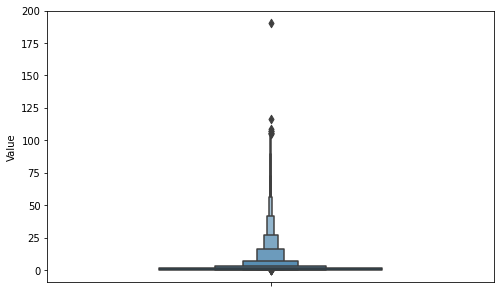

In [14]:
plt.figure(figsize=(8,5))
sns.boxenplot(y='Value', data=player_list, width=0.5)
plt.show()

C:\Users\adhna\AppData\Local\Temp\ipykernel_21832\515352127.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x).set_title('Frequency Distribution Plot of Player Actual Values')


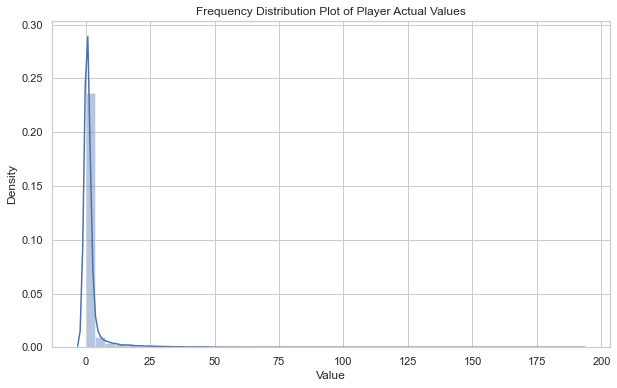

In [15]:
x = player_list.Value
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.distplot(x).set_title('Frequency Distribution Plot of Player Actual Values')
plt.show()

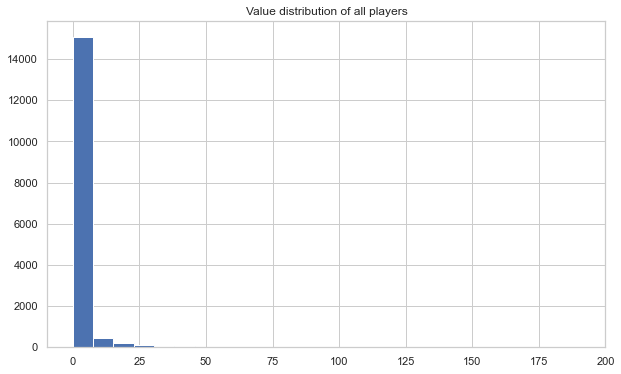

In [16]:
plt.figure(1, figsize=(10, 6))
sns.set(style="whitegrid")
plt.hist( x= 'Value', bins=25,data=player_list)
plt.title('Value distribution of all players')
plt.show()

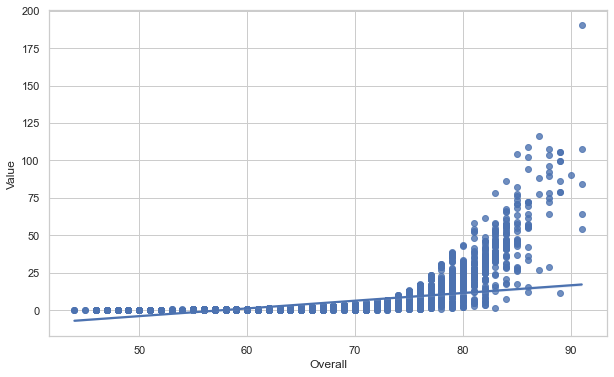

In [17]:
plt.figure(figsize=(10,6))
sns.regplot(x="Overall",y="Value",data=player_list)
plt.show()

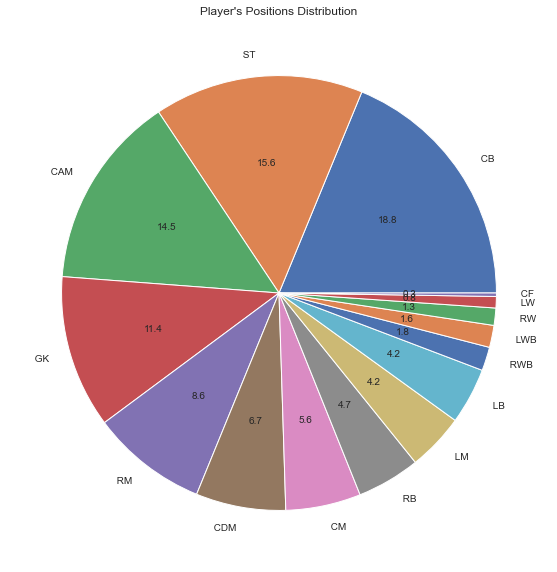

In [18]:
plt.figure(figsize=(10,10))
loc=player_list.Position.value_counts()
loc.plot(kind='pie' ,autopct='%.1f',fontsize=10,subplots=True)
plt.title("Player's Positions Distribution")
plt.ylabel("")
plt.show()

<Figure size 2000x2000 with 0 Axes>

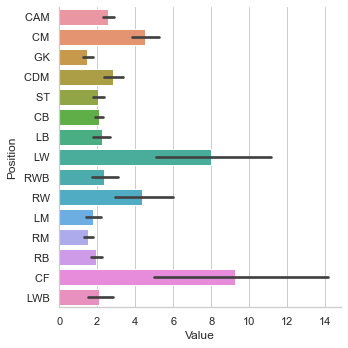

In [19]:
plt.figure(figsize=(10,10),dpi=200)
graph = sns.catplot(y="Position", x="Value", kind="bar",  data=player_list)
plt.show()